## Modeling Procedures
1. Plot the time series data
2. If needed apply variance transformations to stabilize variance(box cox)
   - Cannot apply log to negative time series, so always apply the variance transformations before differencing 
3. If needed, take differences to make it stationary
4. Examine ACF AND PACF of the differenced time series to obtain the order of the model
   - Try to determine candidate models
5. Check the residuals of the model, if residuals look like white noise, then model is good becuase it has no structure, and the model has a good fit:
   - $\hat{\epsilon_t} = X_t - \hat{X_t}$
6. Use selection criteria (AIC, SBC, HQ) to select the best model
7. Use the best model to compute forecasts.

Identification
Estimation
Diagnostic Checking 
Model Selection
Forecasting
Identification
 | ACF | # PCF
---|---|---
AR(P) | tails off  | cuts off after lag P
MA(Q) | cuts off after lag q | tails off 
Estimation
- MLE Method (maximum likelihood estimation method)
  - (minimise function of residuals)

- OLS Method 
  - For AR(p) but **not for MA(q) model**

Quality of parameter estimates:
- hypothesis estimate $H_0 : \beta_j = 0 vs H_1: \beta_j \ne 0$
Check whether the residuals are white noise
- $H_0 : \rho^R_k = 0 vs H_1: \rho_k^R \ne 0$

## ARMA Models: Identification, Estimation, Testing, Selection
### Model Identification
1. Plot the time series and examine whether the series contains a trend, seasonality, outliers, non-constant variances and other nonstationary phenomena. Choose proper **variance-stabilizing** (Box-Cox’s power transformation) and **differencing transformations**.
2. Compute the **sample ACF** and the **sample PACF** of the original series and identify the degree of differencing d to achieve stationarity, $(1 − 𝐵)^d 𝑋_t$ . In practice, d is either 0, 1, or 2.
3. Compute the **sample ACF** and the **sample PACF** of the stationary series and identify the orders p and q for the **autoregressive** and **moving average** operators. Usually, the needed orders of integers p and q are less or equal to 3.
4. In general, find models with good economic meaning; can have significant correlation at high lags but the inference cannot be drawn. Try to build simple models with small parameters. 

/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


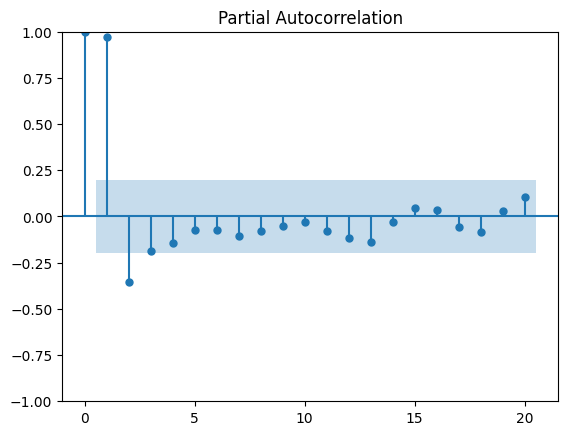

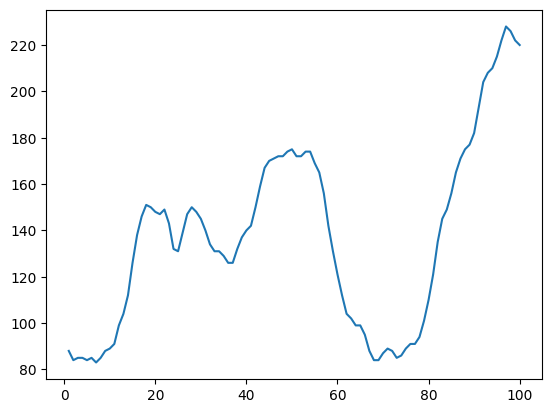

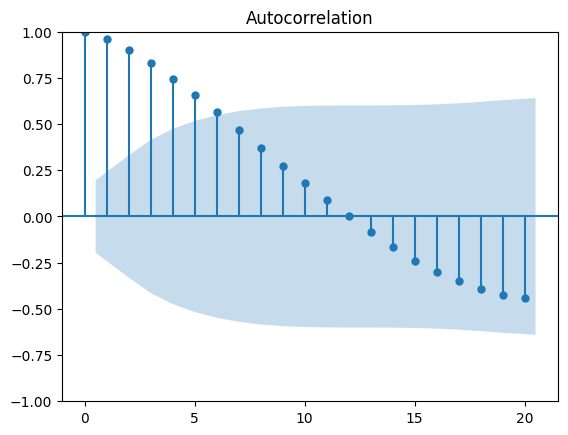

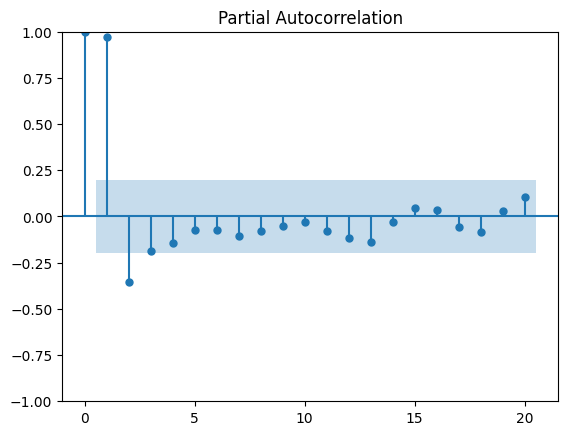

In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

df = pd.read_csv(r'/Users/dhruvpandit/Documents/GitHub/ISEG_AEF/STEM-EAP17/WWWusage.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
plt.plot(df['time'], df['value'])
tsaplots.plot_acf(df['value'])
tsaplots.plot_pacf(df['value'])


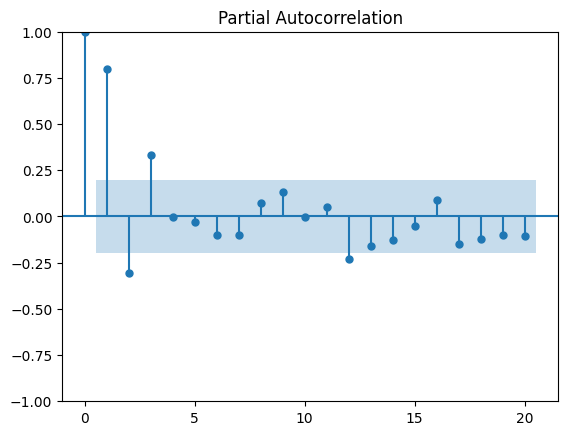

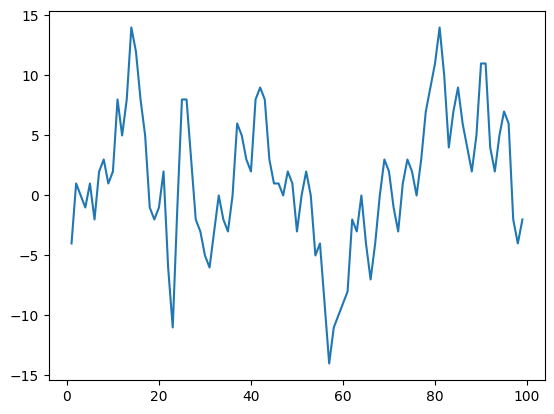

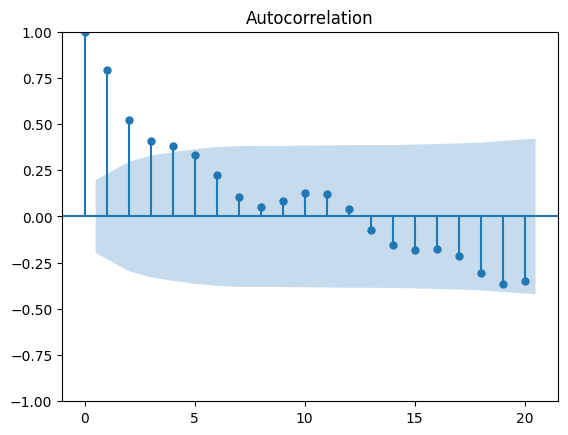

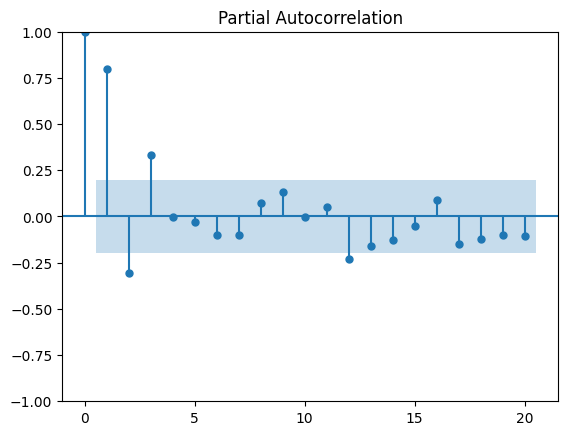

In [12]:
differenced = sm.tsa.statespace.tools.diff(df['value'])
plt.plot( differenced)
tsaplots.plot_acf(differenced)
tsaplots.plot_pacf(differenced)


In [33]:
import numpy as np
differenced = np.array(differenced)

In [38]:
from statsmodels.tsa.ar_model import AutoReg
res = AutoReg(endog=differenced, lags=3).fit()
res.summary()
from statsmodels.tsa.statespace.sarimax import SARIMAX
res3 = SARIMAX(differenced, order = (0, 0, 3)).fit()
res3.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74745D+00    |proj g|=  1.79706D-01

At iterate    5    f=  2.58866D+00    |proj g|=  2.31336D-02

At iterate   10    f=  2.58723D+00    |proj g|=  4.69150D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     14      1     0     0   1.459D-06   2.587D+00
  F =   2.5872304768688612     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:               SARIMAX(0, 0, 3)   Log Likelihood                -256.136
Date:                Wed, 02 Nov 2022   AIC                            520.272
Time:                        18:57:43   BIC                            530.652
Sample:                             0   HQIC                           524.472
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2199      0.103     11.900      0.000       1.019       1.421
ma.L2          0.6662      0.174      3.818      0.000       0.324       1.008
ma.L3          0.1302      0.128      1.017      0.309      -0.121       0.381
sigma2        10.1868      1.451      7.019      0.000       7.342      13.031
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.97   Prob(JB):                         0.75
Heteroskedasticity (H):               0.66   Skew:                            -0.16
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

For the fitted model, the residuals should be have a white noise proccess with mean $\mu = 0$, and the ACF and PACF after lag 0 be null.
This would indicate that our fitted model is a good approximation.
## Model Selection
Suppose you have two, or three models to choose from. Which ones should you pick?
Akaike Information Criteria (AIC)
- tends to overestimate
- Lowest AIC is the one to go to
- 
  
Schwartz Bayesian criterion (SBC):


In [47]:
df['time'].tail(1).values[0]

100

In [46]:
df['value'].tail(1).values

array([220])

In [60]:
a = res.predict(start = df['time'].head(1).values[0], end= df['time'].tail(1).values[0], dynamic=False)

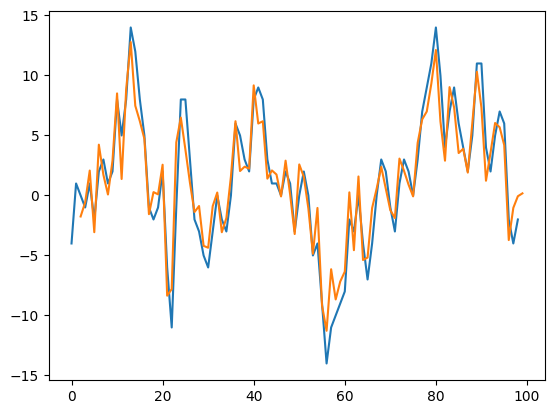

In [63]:
plt.plot(differenced)
plt.plot(a)